# Data Merging

In [1]:
import os
import glob
import pandas as pd
import calendar
from IPython.display import display
from pandas.api.types import CategoricalDtype

In [2]:
#get the file paths of all the Excel files in the folder
folder_path = "C:/Users/Hp/RBI_Prepared_Excel_Files"
#get a list of all xlsx files in the folder
excel_files = glob.glob(folder_path + '/*.xlsx')
#sort the excek files list by month and year
order = ['Apr_2022', 'May_2022', 'Jun_2022', 'Jul_2022', 'Aug_2022', 'Sep_2022', 'Oct_2022', 'Nov_2022', 'Dec_2022',
         'Jan_2023', 'Feb_2023', 'Mar_2023']
excel_files = sorted(excel_files, key=lambda x: order.index(x.split('/')[-1].split('\\')[-1].split('.')[0]))
print(excel_files)

['C:/Users/Hp/RBI_Prepared_Excel_Files\\Apr_2022.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\May_2022.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\Jun_2022.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\Jul_2022.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\Aug_2022.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\Sep_2022.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\Oct_2022.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\Nov_2022.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\Dec_2022.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\Jan_2023.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\Feb_2023.xlsx', 'C:/Users/Hp/RBI_Prepared_Excel_Files\\Mar_2023.xlsx']


In [3]:
#initialize an empty list to store the prepared dataframes
frames = []

In [4]:
#loop over each xlsx file
for file in excel_files:

    #extract the month and the year from the name of the file
    file_name = file.split('/')[-1].split('\\')[-1]
    month_year = file_name.split('.')[0]
    month, year = month_year.split('_')

    #read the excel file into a dataframe
    df= pd.read_excel(file)

    #rename columns
    df.rename(columns={'Bank Name': 'bank_name',
                   'Bank Type': 'bank_type',
                   'Credit Cards': 'credit_cards',
                   'Debit Cards': 'debit_cards',
                   'Credit Card Transactions': 'cc_transactions',
                   'Credit Card INR Value': 'cc_inr_value',
                   'Debit Card Transactions': 'dc_transactions',
                   'Debit Card INR Value': 'dc_inr_value'}, inplace=True)

    #print first few rows
    display(df.head())
    print(df.shape)

    #add column for month and year
    df['month_year'] = f'{month}_{year}'

    frames.append(df)

#merge data
merged_df = pd.concat(frames)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1194104,75272375,2555872,9.288661e+09,12719853,2.294928e+10
1,BANK OF INDIA,Public,165625,44965718,268651,8.180705e+08,8092268,1.273034e+10
2,BANK OF MAHARASHTRA,Public,77592,12382388,93486,3.810745e+08,4249073,6.098393e+09
3,CANARA BANK,Public,917871,47155319,920892,2.562248e+09,14796245,2.743993e+10
4,CENTRAL BANK OF INDIA,Public,0,30407359,0,0.000000e+00,3516187,7.102464e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1267896,75630687,2954601,1.087133e+10,12868292,2.307537e+10
1,BANK OF INDIA,Public,165929,45256890,277634,8.492350e+08,8092408,1.269866e+10
2,BANK OF MAHARASHTRA,Public,77291,12523886,91537,3.773794e+08,3880688,5.892887e+09
3,CANARA BANK,Public,915470,46959288,956097,2.722424e+09,14503376,2.765761e+10
4,CENTRAL BANK OF INDIA,Public,0,28963920,0,0.000000e+00,3549449,7.050976e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1348264,75993816,2936292,1.151898e+10,11972147,2.129156e+10
1,BANK OF INDIA,Public,169240,45402570,250779,7.815972e+08,7469283,1.156791e+10
2,BANK OF MAHARASHTRA,Public,77017,12651775,83933,3.493896e+08,3464205,5.054377e+09
3,CANARA BANK,Public,922700,46100836,929375,2.667499e+09,13413751,2.506292e+10
4,CENTRAL BANK OF INDIA,Public,0,27038530,0,0.000000e+00,3334277,6.442263e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1416927,76491940,3186932,1.274739e+10,11969658,2.146026e+10
1,BANK OF INDIA,Public,161832,45431685,247491,7.897735e+08,7516774,1.174562e+10
2,BANK OF MAHARASHTRA,Public,76761,12784888,79760,3.287885e+08,3449433,5.072637e+09
3,CANARA BANK,Public,913399,46819589,974364,2.808209e+09,13549888,2.605660e+10
4,CENTRAL BANK OF INDIA,Public,0,27305718,0,0.000000e+00,3568336,7.152105e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1428072,76893503,3509197,1.368748e+10,11548037,2.085750e+10
1,BANK OF INDIA,Public,150601,45494860,255862,8.020172e+08,7239360,1.148022e+10
2,BANK OF MAHARASHTRA,Public,76504,12915821,86079,3.507619e+08,3308366,4.882430e+09
3,CANARA BANK,Public,527272,47715491,979548,2.820509e+09,13262489,2.579633e+10
4,CENTRAL BANK OF INDIA,Public,0,27556286,0,0.000000e+00,3498264,6.897732e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1502964,77708499,3560053,1.431136e+10,10890426,1.991990e+10
1,BANK OF INDIA,Public,138964,45593205,229260,7.721739e+08,6608257,1.063221e+10
2,BANK OF MAHARASHTRA,Public,78338,13037906,81119,3.418821e+08,3052116,4.447105e+09
3,CANARA BANK,Public,558886,48539815,959368,2.846570e+09,12834228,2.512742e+10
4,CENTRAL BANK OF INDIA,Public,0,27340402,0,0.000000e+00,3157967,6.422105e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1578148,78440427,3865411,1.588513e+10,10484264,2.287974e+10
1,BANK OF INDIA,Public,84114,45831608,232478,8.380060e+08,6973386,1.253176e+10
2,BANK OF MAHARASHTRA,Public,77883,13155196,91596,3.971565e+08,3317877,5.712008e+09
3,CANARA BANK,Public,569338,47982447,1055173,3.204764e+09,13313807,2.802384e+10
4,CENTRAL BANK OF INDIA,Public,0,27369834,0,0.000000e+00,3881692,8.681142e+09


(42, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1638457,79475125,3789262,1.574967e+10,9281870,1.872281e+10
1,BANK OF INDIA,Public,86053,46304287,215554,7.553660e+08,6185045,1.034610e+10
2,BANK OF MAHARASHTRA,Public,77461,13170703,82782,3.554333e+08,2811249,4.320988e+09
3,CANARA BANK,Public,593845,48645220,969781,2.899036e+09,11593116,2.320707e+10
4,CENTRAL BANK OF INDIA,Public,0,27727499,0,0.000000e+00,3501019,7.454984e+09


(43, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1752184,80262159,4202560,1.667382e+10,10109865,2.053282e+10
1,BANK OF INDIA,Public,84378,46576513,226898,8.011105e+08,6217366,1.046568e+10
2,BANK OF MAHARASHTRA,Public,42447,13196639,83013,3.589237e+08,2606530,4.046843e+09
3,CANARA BANK,Public,603490,49420963,1083150,3.235899e+09,11505733,2.421706e+10
4,CENTRAL BANK OF INDIA,Public,0,27742934,0,0.000000e+00,3466794,7.568135e+09


(43, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1824299,80696087,4363678,1.713072e+10,8874197,1.882833e+10
1,BANK OF INDIA,Public,84722,46824899,231092,8.063095e+08,5960644,1.021506e+10
2,BANK OF MAHARASHTRA,Public,33716,13271463,83834,3.555929e+08,2540119,4.026305e+09
3,CANARA BANK,Public,610068,49589295,1090150,3.365776e+09,11078054,2.380718e+10
4,CENTRAL BANK OF INDIA,Public,0,28029550,0,0.000000e+00,3312765,7.383159e+09


(43, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1888684,81510140,3892795,1.598854e+10,7770905,1.663100e+10
1,BANK OF INDIA,Public,84801,47251202,204588,7.322966e+08,5387328,9.331766e+09
2,BANK OF MAHARASHTRA,Public,33639,13296825,72969,3.187503e+08,2265380,3.583696e+09
3,CANARA BANK,Public,615427,50582378,992550,3.183396e+09,9925724,2.128738e+10
4,CENTRAL BANK OF INDIA,Public,0,28316825,0,0.000000e+00,2973953,6.603871e+09


(43, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1947283,82585036,4252199,1.806517e+10,8164394,1.769258e+10
1,BANK OF INDIA,Public,77101,47125002,224626,8.035811e+08,5747485,9.915356e+09
2,BANK OF MAHARASHTRA,Public,33493,13377060,82261,3.726635e+08,2409298,3.892499e+09
3,CANARA BANK,Public,624417,51324626,1102235,3.618640e+09,10583093,2.306669e+10
4,CENTRAL BANK OF INDIA,Public,0,28360519,0,0.000000e+00,2751326,5.987091e+09


(43, 8)


In [5]:
merged_df = merged_df.reset_index(drop=True)
display(merged_df)
print(merged_df.shape)

,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value,month_year
0,BANK OF BARODA,Public,1194104,75272375,2555872,9.288661e+09,12719853,2.294928e+10,Apr_2022
1,BANK OF INDIA,Public,165625,44965718,268651,8.180705e+08,8092268,1.273034e+10,Apr_2022
2,BANK OF MAHARASHTRA,Public,77592,12382388,93486,3.810745e+08,4249073,6.098393e+09,Apr_2022
3,CANARA BANK,Public,917871,47155319,920892,2.562248e+09,14796245,2.743993e+10,Apr_2022
4,CENTRAL BANK OF INDIA,Public,0,30407359,0,0.000000e+00,3516187,7.102464e+09,Apr_2022
...,...,...,...,...,...,...,...,...,...
498,DEUTSCHE BANK LTD,Foreign,0,115898,0,0.000000e+00,68213,1.993369e+08,Mar_2023
499,HSBC LTD,Foreign,699170,582108,1799629,7.722864e+09,313749,1.033025e+09,Mar_2023
500,SBM BANK INDIA LTD,Foreign,1072764,602345,1743598,6.294124e+09,59817,1.308682e+08,Mar_2023
501,STANDARD CHARTERED BANK LTD,Foreign,1061075,1137359,2855918,1.205768e+10,1007368,2.604378e+09,Mar_2023


(503, 9)


In [6]:
merged_df.to_csv("RBI_Data.csv",index=None)

In [7]:
data=pd.read_csv("C:/Users/Hp/RBI_Data.csv")
data.head()


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value,month_year
0,BANK OF BARODA,Public,1194104,75272375,2555872,9.288661e+09,12719853,2.294928e+10,Apr_2022
1,BANK OF INDIA,Public,165625,44965718,268651,8.180705e+08,8092268,1.273034e+10,Apr_2022
2,BANK OF MAHARASHTRA,Public,77592,12382388,93486,3.810745e+08,4249073,6.098393e+09,Apr_2022
3,CANARA BANK,Public,917871,47155319,920892,2.562248e+09,14796245,2.743993e+10,Apr_2022
4,CENTRAL BANK OF INDIA,Public,0,30407359,0,0.000000e+00,3516187,7.102464e+09,Apr_2022


In [8]:
data.tail()

,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value,month_year
498,DEUTSCHE BANK LTD,Foreign,0,115898,0,0.000000e+00,68213,1.993369e+08,Mar_2023
499,HSBC LTD,Foreign,699170,582108,1799629,7.722864e+09,313749,1.033025e+09,Mar_2023
500,SBM BANK INDIA LTD,Foreign,1072764,602345,1743598,6.294124e+09,59817,1.308682e+08,Mar_2023
501,STANDARD CHARTERED BANK LTD,Foreign,1061075,1137359,2855918,1.205768e+10,1007368,2.604378e+09,Mar_2023
502,WOORI BANK,Foreign,0,977,0,0.000000e+00,5706,1.733143e+07,Mar_2023


In [9]:
data.shape

(503, 9)

In [10]:
df_copy=data.copy()

# Data Analysis By EDA

In [69]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
# Getting information about dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bank_name        503 non-null    object 
 1   bank_type        503 non-null    object 
 2   credit_cards     503 non-null    int64  
 3   debit_cards      503 non-null    int64  
 4   cc_transactions  503 non-null    int64  
 5   cc_inr_value     503 non-null    float64
 6   dc_transactions  503 non-null    int64  
 7   dc_inr_value     503 non-null    float64
 8   month_year       503 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 35.5+ KB


**Checking for Missing Values :**

In [71]:
#check for missing values
df_copy.isnull().sum()

bank_name          0
bank_type          0
credit_cards       0
debit_cards        0
cc_transactions    0
cc_inr_value       0
dc_transactions    0
dc_inr_value       0
month_year         0
dtype: int64

There is no missing values in dataset..

**Descriptive Statistics :**

In [72]:
#Getting descriptive statistics for numerical columns
df_copy.describe()

,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
count,5.030000e+02,5.030000e+02,5.030000e+02,5.030000e+02,5.030000e+02,5.030000e+02
mean,1.898603e+06,2.044124e+07,5.771119e+06,2.833425e+10,6.677918e+06,1.413585e+10
std,4.117374e+06,4.404301e+07,1.353327e+07,6.846261e+10,1.384306e+07,2.920920e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.401500e+03,1.153958e+06,5.833500e+03,2.156204e+07,4.424385e+05,1.087973e+09
50%,1.543530e+05,4.339149e+06,2.686510e+05,1.131675e+09,2.081628e+06,4.175207e+09
75%,1.330382e+06,2.771558e+07,3.120096e+06,1.392643e+10,7.071900e+06,1.295542e+10
max,1.794986e+07,2.795300e+08,6.348455e+07,3.763982e+11,9.460605e+07,1.793565e+11


In [73]:
# Getting descriptive statistics for categorical columns
df_copy.describe(include='object')

,bank_name,bank_type,month_year
count,503,503,503
unique,54,3,12
top,BANK OF BARODA,Private,Nov_2022
freq,12,246,43


In [74]:
# Getting numerical columns
num_data=[column for column in df_copy.select_dtypes(include=['int64', 'float64'])]
num_data    

['credit_cards',
 'debit_cards',
 'cc_transactions',
 'cc_inr_value',
 'dc_transactions',
 'dc_inr_value']

In [75]:
# Getting categorical columns
cat_data=[column for column in df_copy.select_dtypes(include='object')]
cat_data

['bank_name', 'bank_type', 'month_year']

In [77]:
[df_copy[column].value_counts() for column in cat_data]

[BANK OF BARODA                          12
 SOUTH INDIAN BANK                       12
 HDFC BANK LTD                           12
 ICICI BANK LTD                          12
 INDUSIND BANK LTD                       12
 KARNATAKA BANK LTD                      12
 KARUR VYSYA BANK LTD                    12
 BANK OF INDIA                           12
 TAMILNAD MERCANTILE BANK LTD            12
 DHANALAKSHMI BANK LTD                   12
 YES BANK LTD                            12
 BANK OF AMERICA                         12
 BARCLAYS BANK PLC                       12
 CITI BANK                               12
 DEUTSCHE BANK LTD                       12
 STANDARD CHARTERED BANK LTD             12
 FEDERAL BANK LTD                        12
 KOTAK MAHINDRA BANK LTD                 12
 DCB BANK LTD                            12
 INDIAN OVERSEAS BANK                    12
 BANK OF MAHARASHTRA                     12
 BANDHAN BANK LTD                        12
 CANARA BANK                    

## Data Visualization

**Correlation between different variables :**

C:\Users\Hp\AppData\Local\Temp\ipykernel_16724\3343400069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_copy.corr()


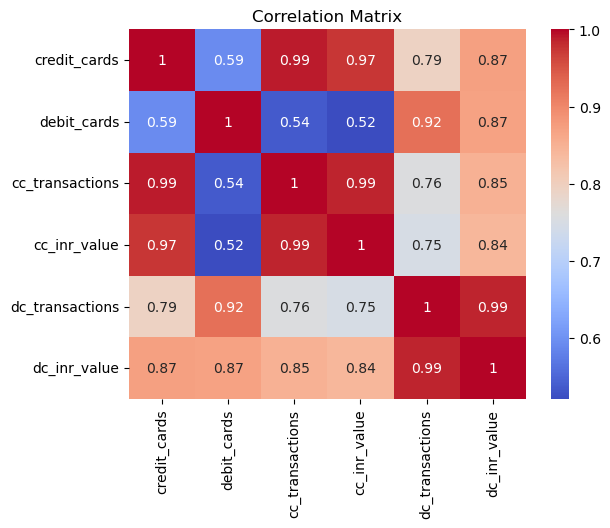

In [76]:
#plot correlation matrix
corr = df_copy.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that there are strong positive correlations between the following pairs of variables:



*   credit_cards and cc_transactions (0.99)
*   credit_cards and cc_inr_value (0.97)
*   dc_transactions and dc_inr_value (0.99)


This suggests that credit cards and debit cards are positively correlated with credit card transactions and debit card transactions, respectively. This is to be expected, as credit cards and debit cards are both used to make purchases.

Also, the correlations between credit variables and debit variables suggest that there is a strong positive relationship between the two. However, it is important to note here that correlation does not imply causation.


### Checking For Outliers :

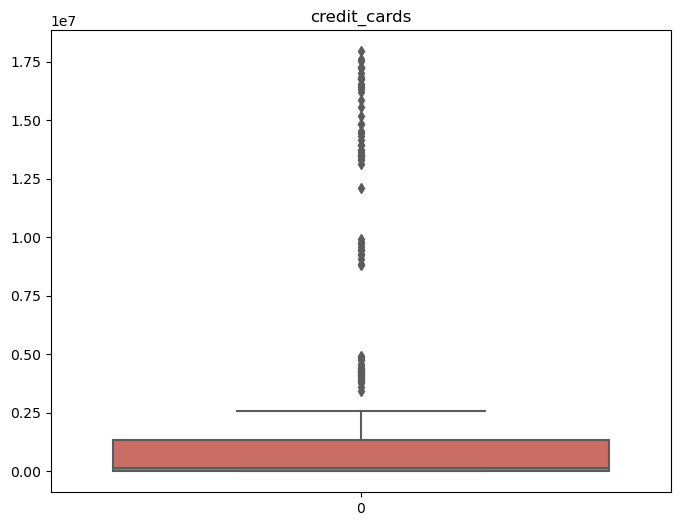

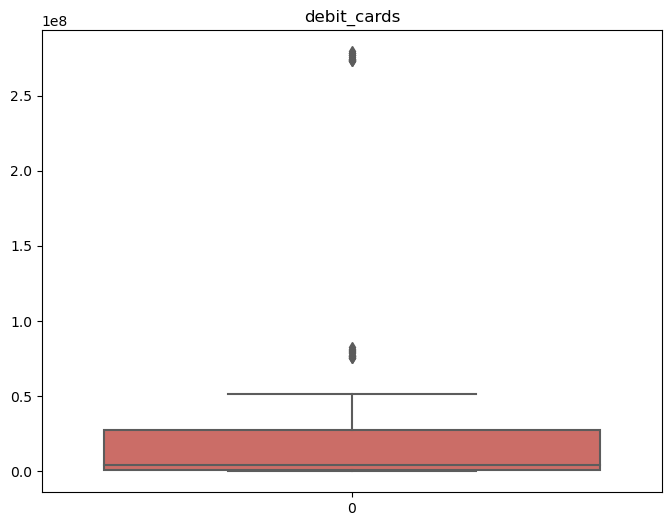

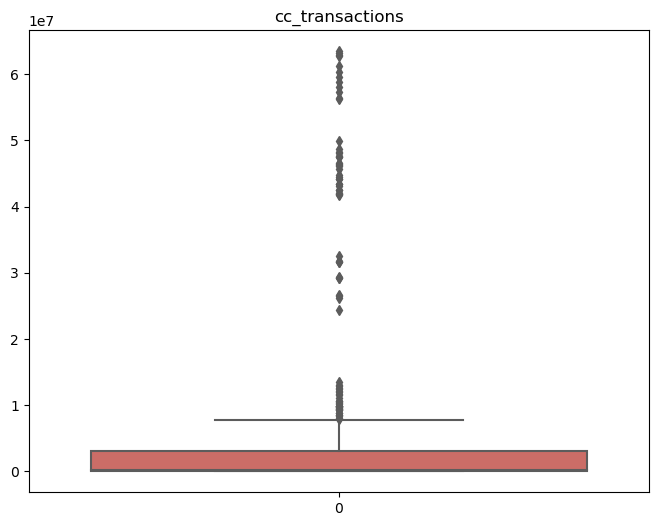

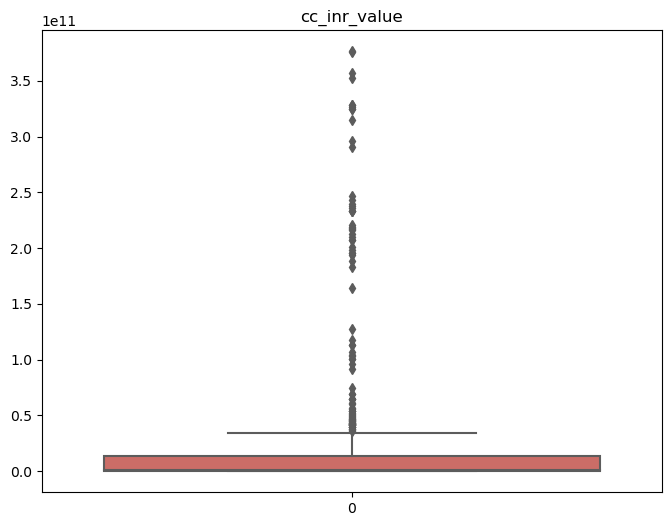

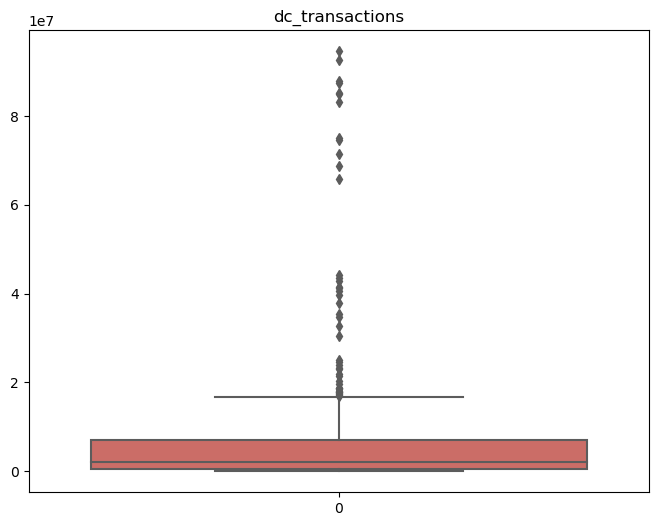

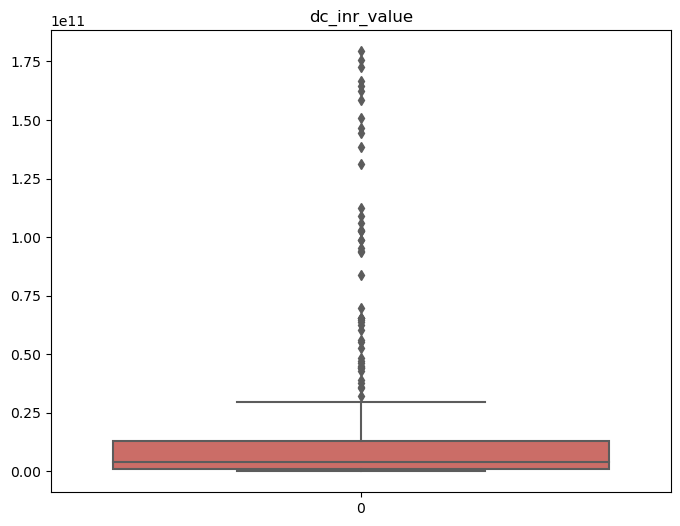

In [49]:
#plot boxplots for the numerical variables
for column in num_data:
    plt.figure(figsize=(8,6))
    sns.boxplot(df_copy[column],palette='hls')
    plt.title(column)
    plt.show()


## Univariate Plot

### Countplot

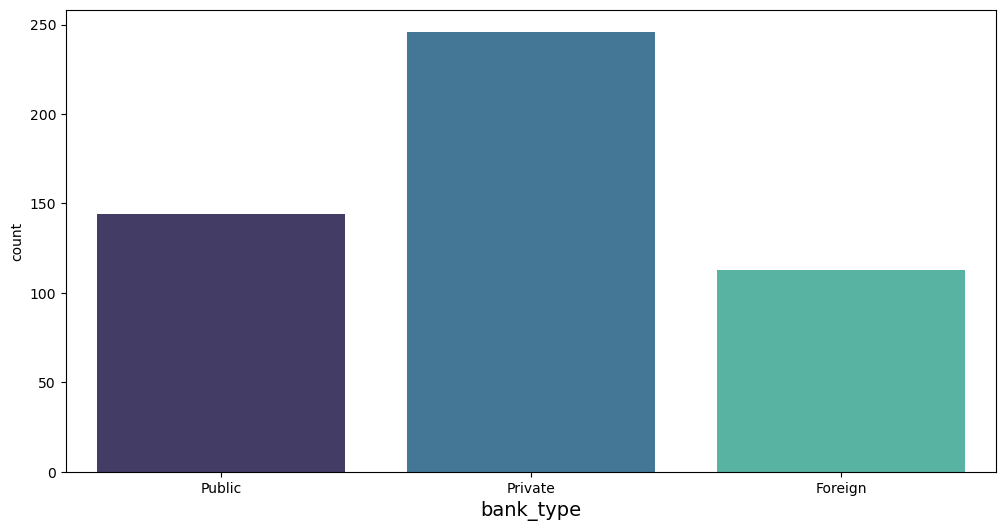

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(x='bank_type' , data=df_copy ,palette='mako')
plt.xlabel('bank_type', fontsize=14)
plt.show()

 Realization:
 . Most of the banks belongs to Private category.

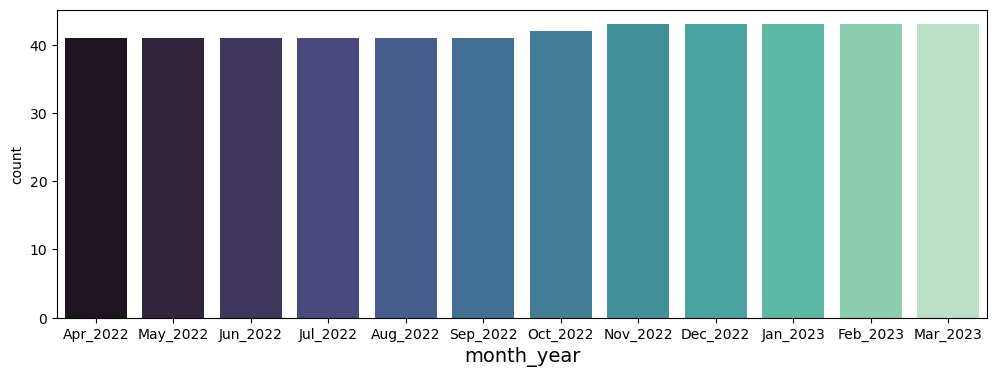

In [80]:
plt.figure(figsize=(12,4))
sns.countplot(x='month_year' , data=df_copy ,palette='mako')
plt.xlabel('month_year', fontsize=14)
plt.show()

## Bivariate Plot

## Scatter Plot

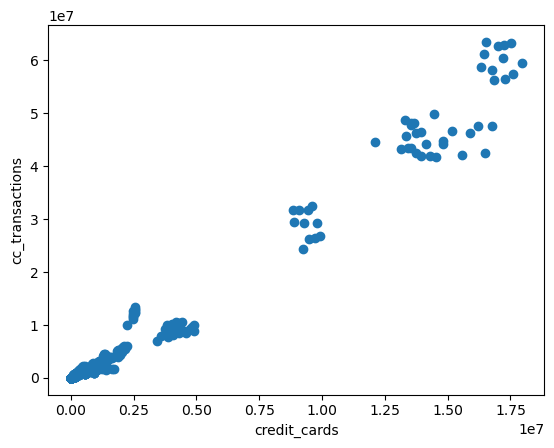

In [68]:
plt.scatter(x=df_copy['credit_cards'],y=df_copy['cc_transactions'])
plt.xlabel('credit_cards')
plt.ylabel('cc_transactions')
plt.show()

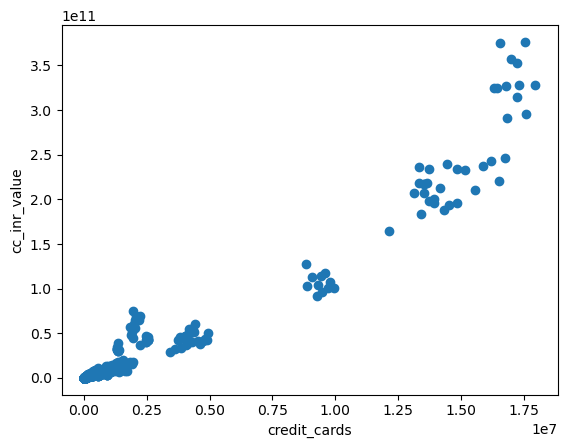

In [99]:
plt.scatter(x=df_copy['credit_cards'],y=df_copy['cc_inr_value'])
plt.xlabel('credit_cards')
plt.ylabel('cc_inr_value')
plt.show()

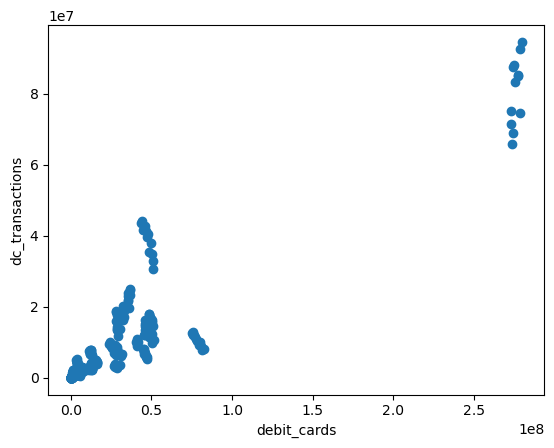

In [104]:
plt.scatter(x=df_copy['debit_cards'],y=df_copy['dc_transactions'])
plt.xlabel('debit_cards')
plt.ylabel('dc_transactions')
plt.show()

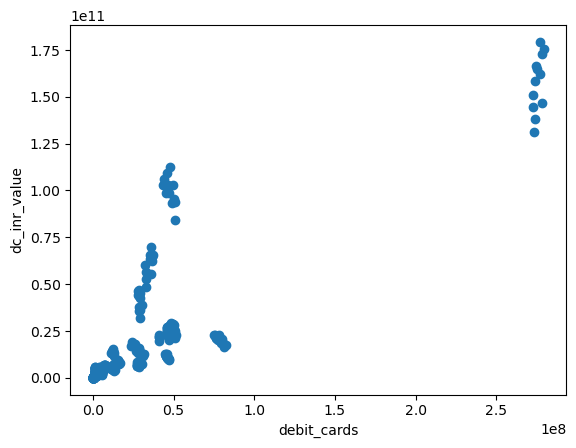

In [103]:
plt.scatter(x=df_copy['debit_cards'],y=df_copy['dc_inr_value'])
plt.xlabel('debit_cards')
plt.ylabel('dc_inr_value')
plt.show()

## Multivariate Plot

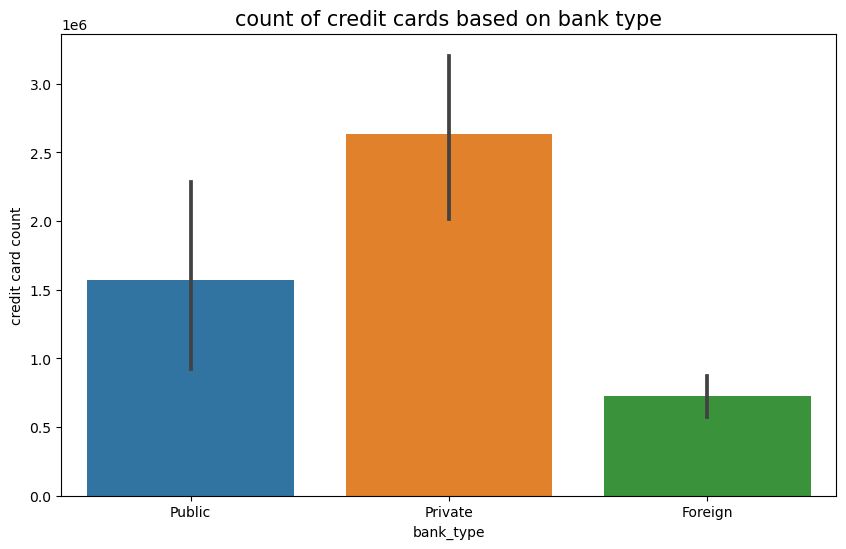

In [118]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy,x='bank_type', y='credit_cards')
plt.title('count of credit cards based on bank type', fontsize=15)
plt.xlabel('bank_type', fontsize=10)
plt.ylabel('credit card count', fontsize=10)
plt.show()

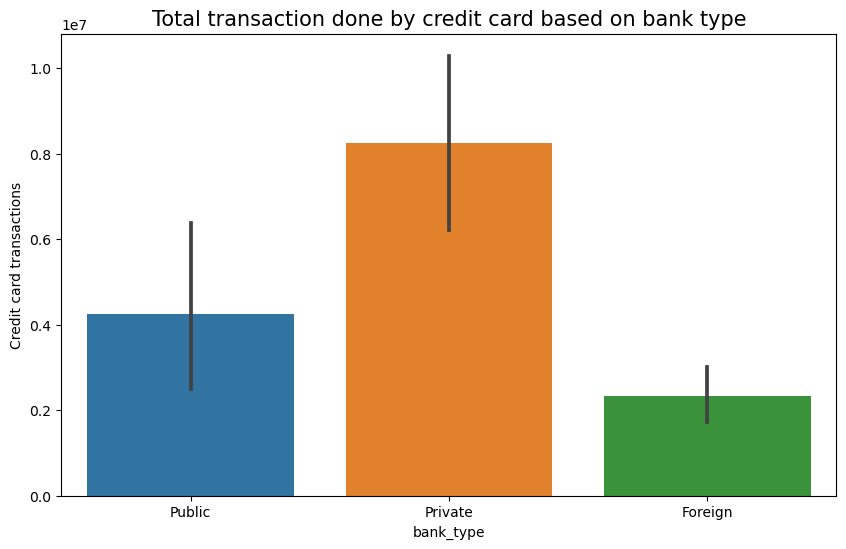

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy,x='bank_type', y='cc_transactions')
plt.title('Total transaction done by credit card based on bank type', fontsize=15)
plt.xlabel('bank_type', fontsize=10)
plt.ylabel('Credit card transactions', fontsize=10)
plt.show()

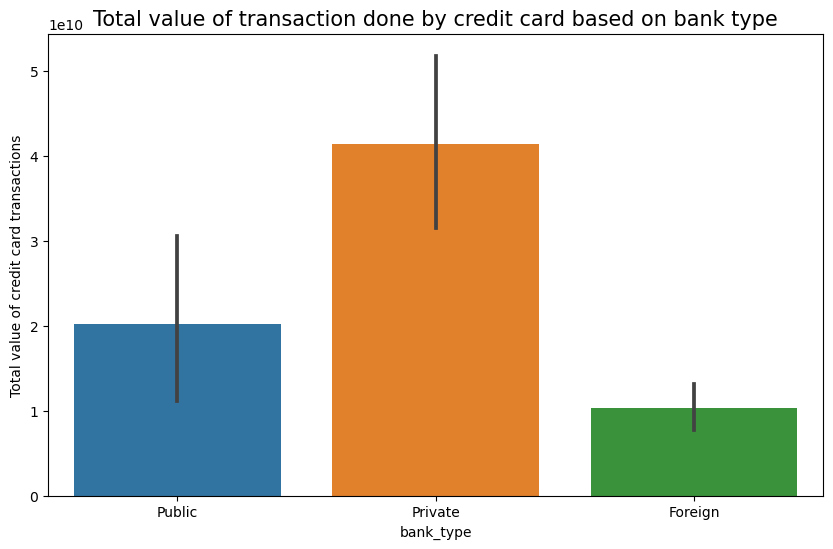

In [116]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy,x='bank_type', y='cc_inr_value')
plt.title('Total value of transaction done by credit card based on bank type', fontsize=15)
plt.xlabel('bank_type', fontsize=10)
plt.ylabel('Total value of credit card transactions', fontsize=10)
plt.show()

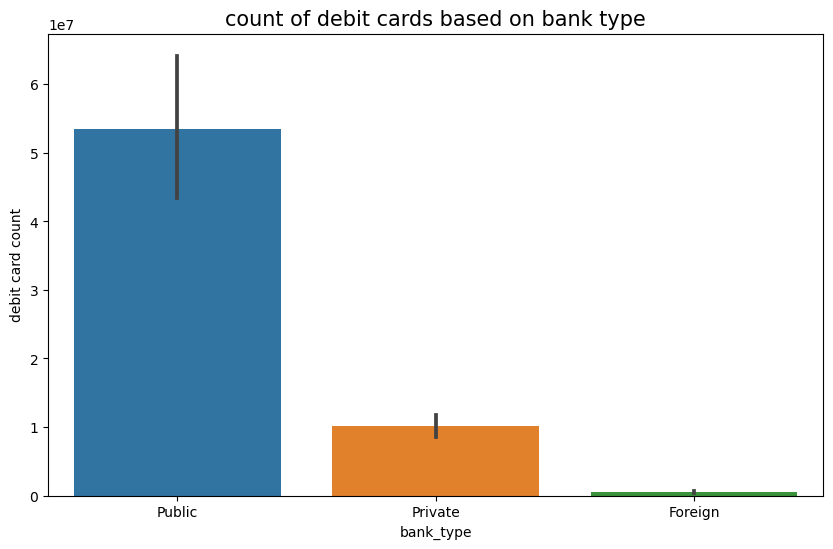

In [115]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy,x='bank_type', y='debit_cards')
plt.title('count of debit cards based on bank type', fontsize=15)
plt.xlabel('bank_type', fontsize=10)
plt.ylabel('debit card count', fontsize=10)
plt.show()

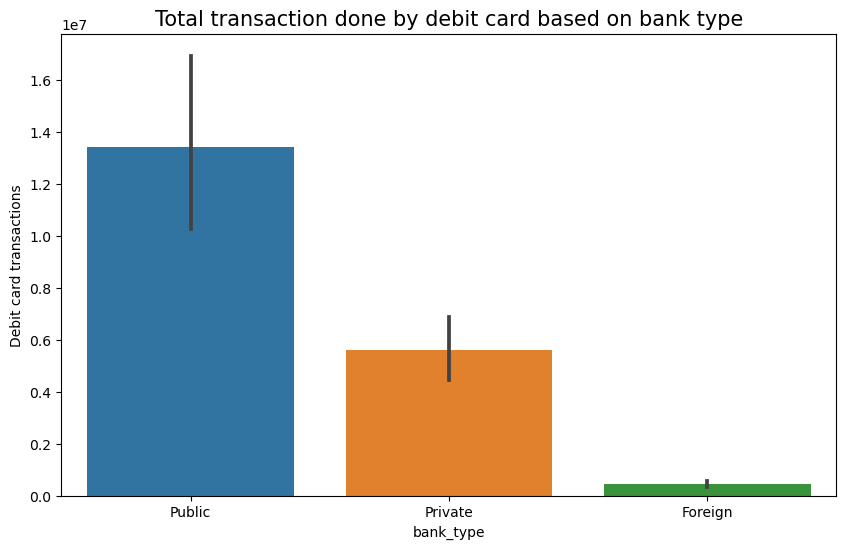

In [114]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy,x='bank_type', y='dc_transactions')
plt.title('Total transaction done by debit card based on bank type', fontsize=15)
plt.xlabel('bank_type', fontsize=10)
plt.ylabel('Debit card transactions', fontsize=10)
plt.show()

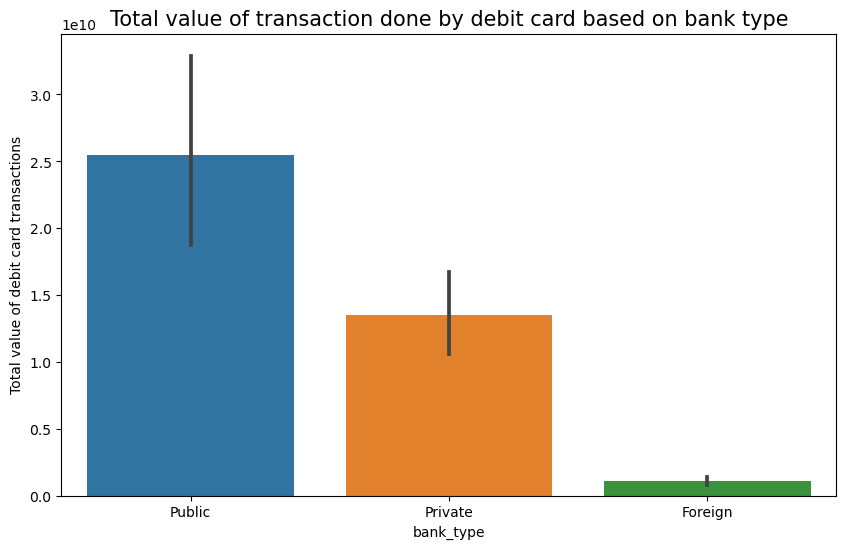

In [113]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy,x='bank_type', y='dc_inr_value')
plt.title('Total value of transaction done by debit card based on bank type', fontsize=15)
plt.xlabel('bank_type', fontsize=10)
plt.ylabel('Total value of debit card transactions', fontsize=10)
plt.show()

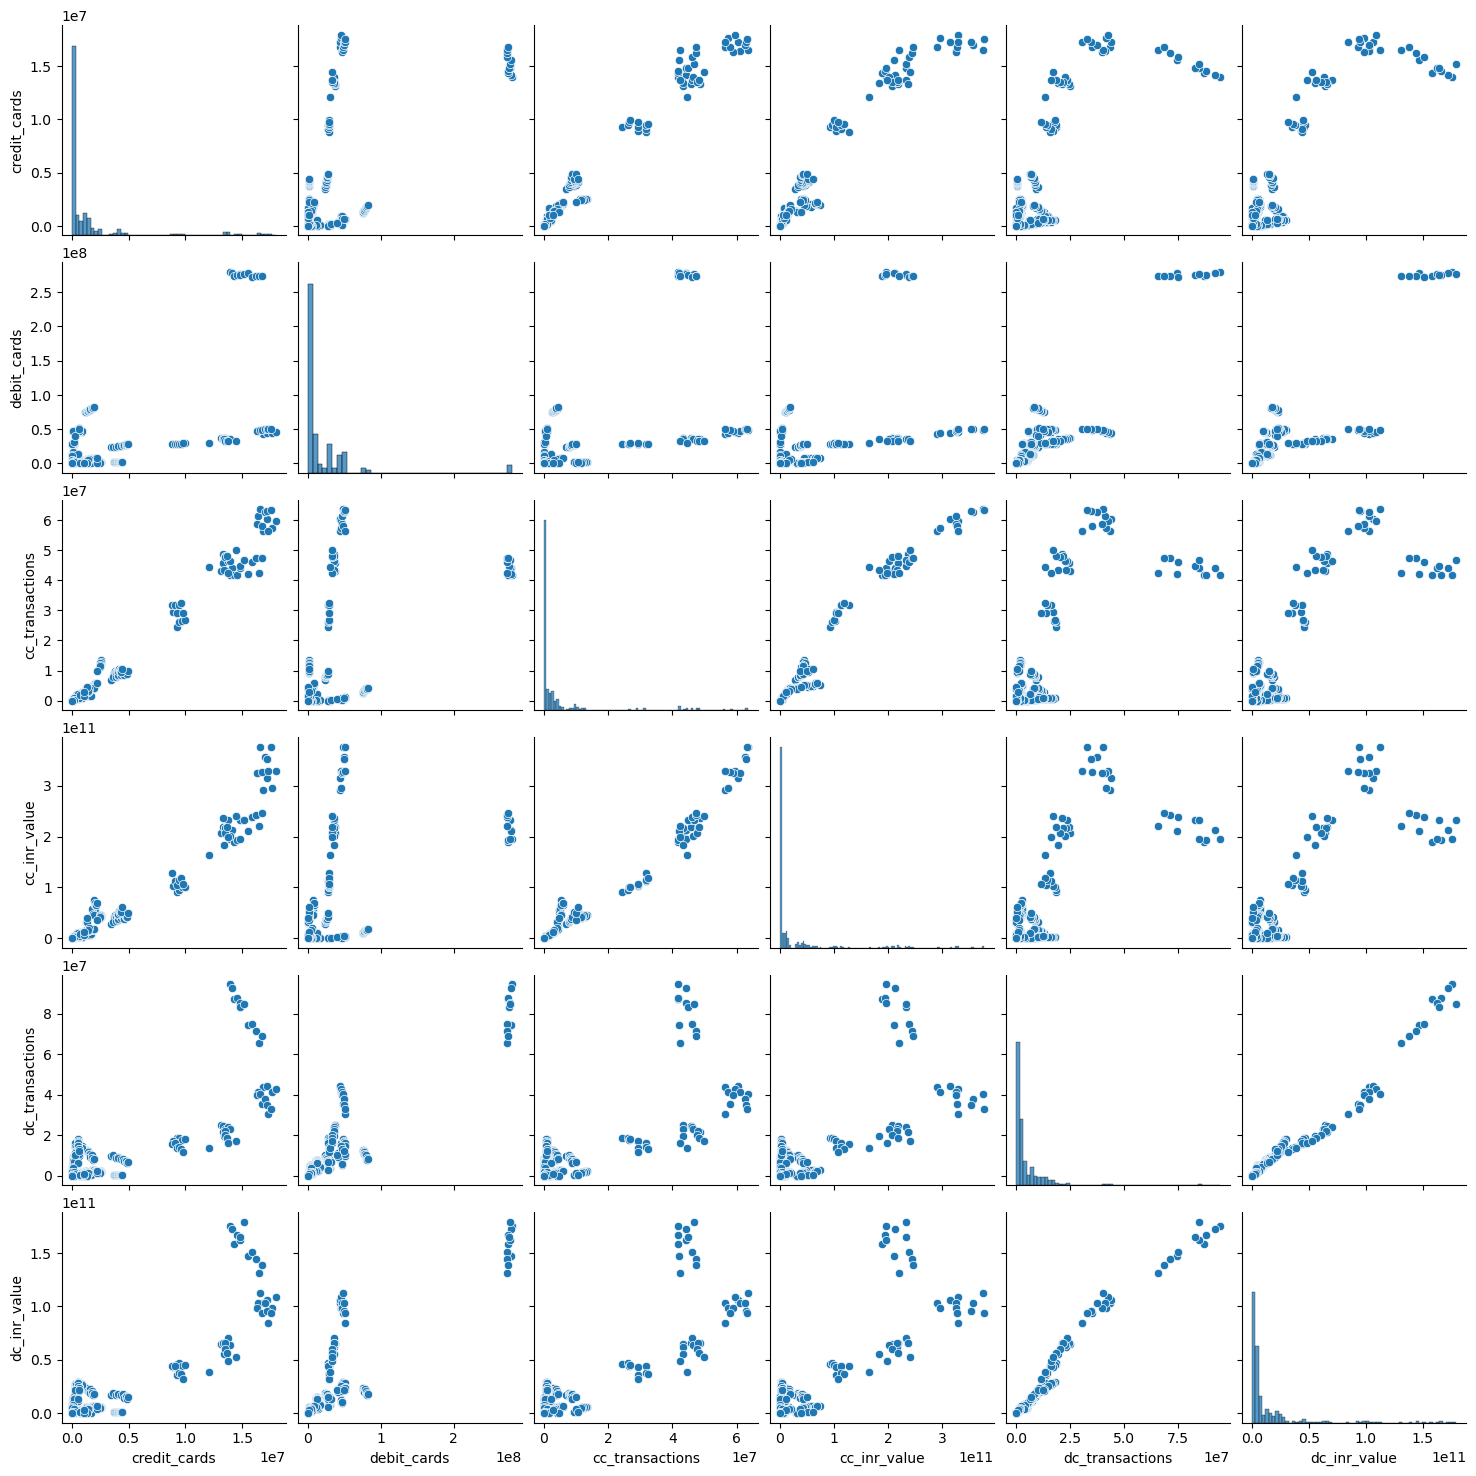

In [108]:
sns.pairplot(df_copy)
plt.show()